In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib


In [2]:
# Upload dataset di Google Colab
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
selected_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel', 'Education', 'DistanceFromHome']
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])  # Yes = 1, No = 0
X = df[selected_features]
y = df['Attrition']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Sebelum SMOTE:", np.bincount(y))
print("Setelah SMOTE:", np.bincount(y_resampled))


Sebelum SMOTE: [1233  237]
Setelah SMOTE: [1233 1233]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Akurasi: 0.8765182186234818
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       250
           1       0.89      0.86      0.87       244

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494



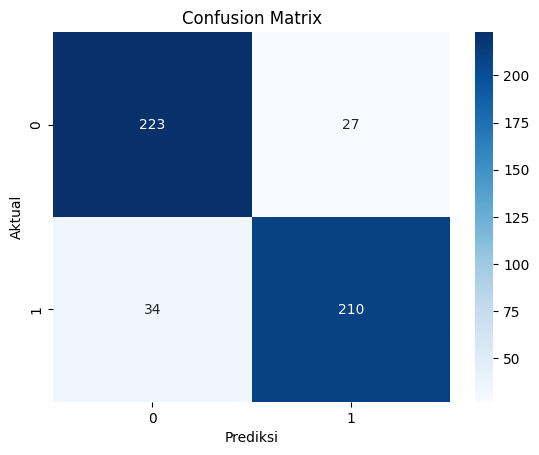

In [6]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


In [7]:
joblib.dump(model, 'model_attrition_rf_smote.pkl')
joblib.dump(scaler, 'scaler_attrition_rf_smote.pkl')


['scaler_attrition_rf_smote.pkl']